In [2]:
#importing the tensorflow 
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
# loading the MNIST fashion from tf Keras

mnist=tf.keras.datasets.fashion_mnist

In [4]:
# spliting the data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Label  9
Image 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

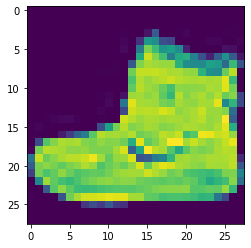

In [11]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

#printing the shoe image
plt.imshow(training_images[0])
#priniting the show lable number
print("Label " , training_labels[0])

print("Image \n" , training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5025 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3382 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8908


In [15]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8701


[0.3575384318828583, 0.8701000213623047]

# Exercise 1

In [19]:
# classifying all the test images
print(type(model.predict(test_images)))
classifications = model.predict(test_images)

#this return an numpy array of how each image has probabilty of all the 9 labels

print(classifications[0])
#or
for i in classifications[7]:
  print(i)

print(test_labels[7])



<class 'numpy.ndarray'>
[4.0918832e-05 4.0966874e-10 1.2976401e-06 3.7697848e-07 1.1556973e-07 5.3369086e-02 2.2033148e-05 5.5055644e-02 5.7198845e-06 8.9150476e-01]
1.1777097e-05
1.8158245e-07
0.00048713933
3.152421e-05
0.0152614815
1.298516e-07
0.98420066
6.213668e-10
7.1437357e-06
3.854802e-09
6


### What does this list represent?

It's the probability that this item is each of the 10 classes

# Excersise 2
Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc4
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1838
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0746
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0475
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0344
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0710
[2.8948730e-09 3.2543088e-09 1.5517941e-09 2.1585643e-05 8.5978994e-14 5.2639570e-10 1.4742414e-14 9.9997461e-01 3.8601744e-09 3.8460880e-06]
7


Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the 
#law of diminishing returns very quickly!

#Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll return an error


##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1831
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0790
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0546
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0418
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0853
[5.1994121e-11 2.9761441e-08 1.5448398e-08 6.6056984e-08 6.4211547e-10 1.8078644e-09 2.9613082e-16 9.9999917e-01 1.9821831e-09 6.7959377e-07]
7


#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [23]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2011
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0507
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0371
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0697
[2.5871550e-08 2.0595010e-10 2.2954566e-08 4.4542580e-06 1.3554571e-13 2.3356275e-09 5.6988778e-13 9.9999559e-01 7.3698297e-10 2.1681895e-08]
7


#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [24]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4717
Epoch 2/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.3588
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3589


In [0]:
# What is Callback functions in tensorflow ??
